In [200]:
import pandas as pd
data = pd.read_csv("server_usage_data.csv")
data.head()

,Time,CPU_Usage,Memory_Usage,Network_Usage,Temperature
0,09-07-2024 00:00,25.000000,5.000000,62.500000,33.523955
1,09-07-2024 00:01,25.623927,5.138739,66.153574,34.201395
2,09-07-2024 00:02,26.247682,5.277392,69.802892,35.004666
3,09-07-2024 00:03,26.871095,5.415872,73.443706,34.683737
4,09-07-2024 00:04,27.493993,5.554094,77.071775,36.080611


In [201]:
from datetime import datetime
for i in range(len(data.iloc[:, 0])):
    data.iloc[i,0] = datetime.strptime(data.iloc[i,0], '%d-%m-%Y %H:%M')
data.head()

,Time,CPU_Usage,Memory_Usage,Network_Usage,Temperature
0,2024-07-09 00:00:00,25.000000,5.000000,62.500000,33.523955
1,2024-07-09 00:01:00,25.623927,5.138739,66.153574,34.201395
2,2024-07-09 00:02:00,26.247682,5.277392,69.802892,35.004666
3,2024-07-09 00:03:00,26.871095,5.415872,73.443706,34.683737
4,2024-07-09 00:04:00,27.493993,5.554094,77.071775,36.080611


In [202]:
data.describe()

,CPU_Usage,Memory_Usage,Network_Usage,Temperature
count,10080.000000,10080.000000,10080.000000,10080.000000
mean,41.407736,7.199340,115.010777,41.365703
std,20.593190,3.217598,53.874221,6.514586
min,10.000000,2.000000,25.000000,27.796231
25%,25.633834,4.788939,74.553980,36.243500
50%,39.182779,7.138533,108.463094,40.806542
75%,55.393982,9.042282,159.780990,46.803793
max,100.000000,16.000000,200.000000,57.858396


In [203]:
time = data.iloc[:, 0]
cpu = data.iloc[:, 1]
mem = data.iloc[:, 2]
net = data.iloc[:, 3]
temp = data.iloc[:, 4]

In [204]:
data.iloc[:,1:].corr()

,CPU_Usage,Memory_Usage,Network_Usage,Temperature
CPU_Usage,1.000000,0.429662,0.316044,0.597826
Memory_Usage,0.429662,1.000000,0.363922,0.486232
Network_Usage,0.316044,0.363922,1.000000,0.944878
Temperature,0.597826,0.486232,0.944878,1.000000


The table above shows that Temperature and Network Usage have a very high positive correlation. Along with this, CPU Usage and Memory Usage have a slightly negative correlation with Network Usage. There don't seem to be other relevant stats.

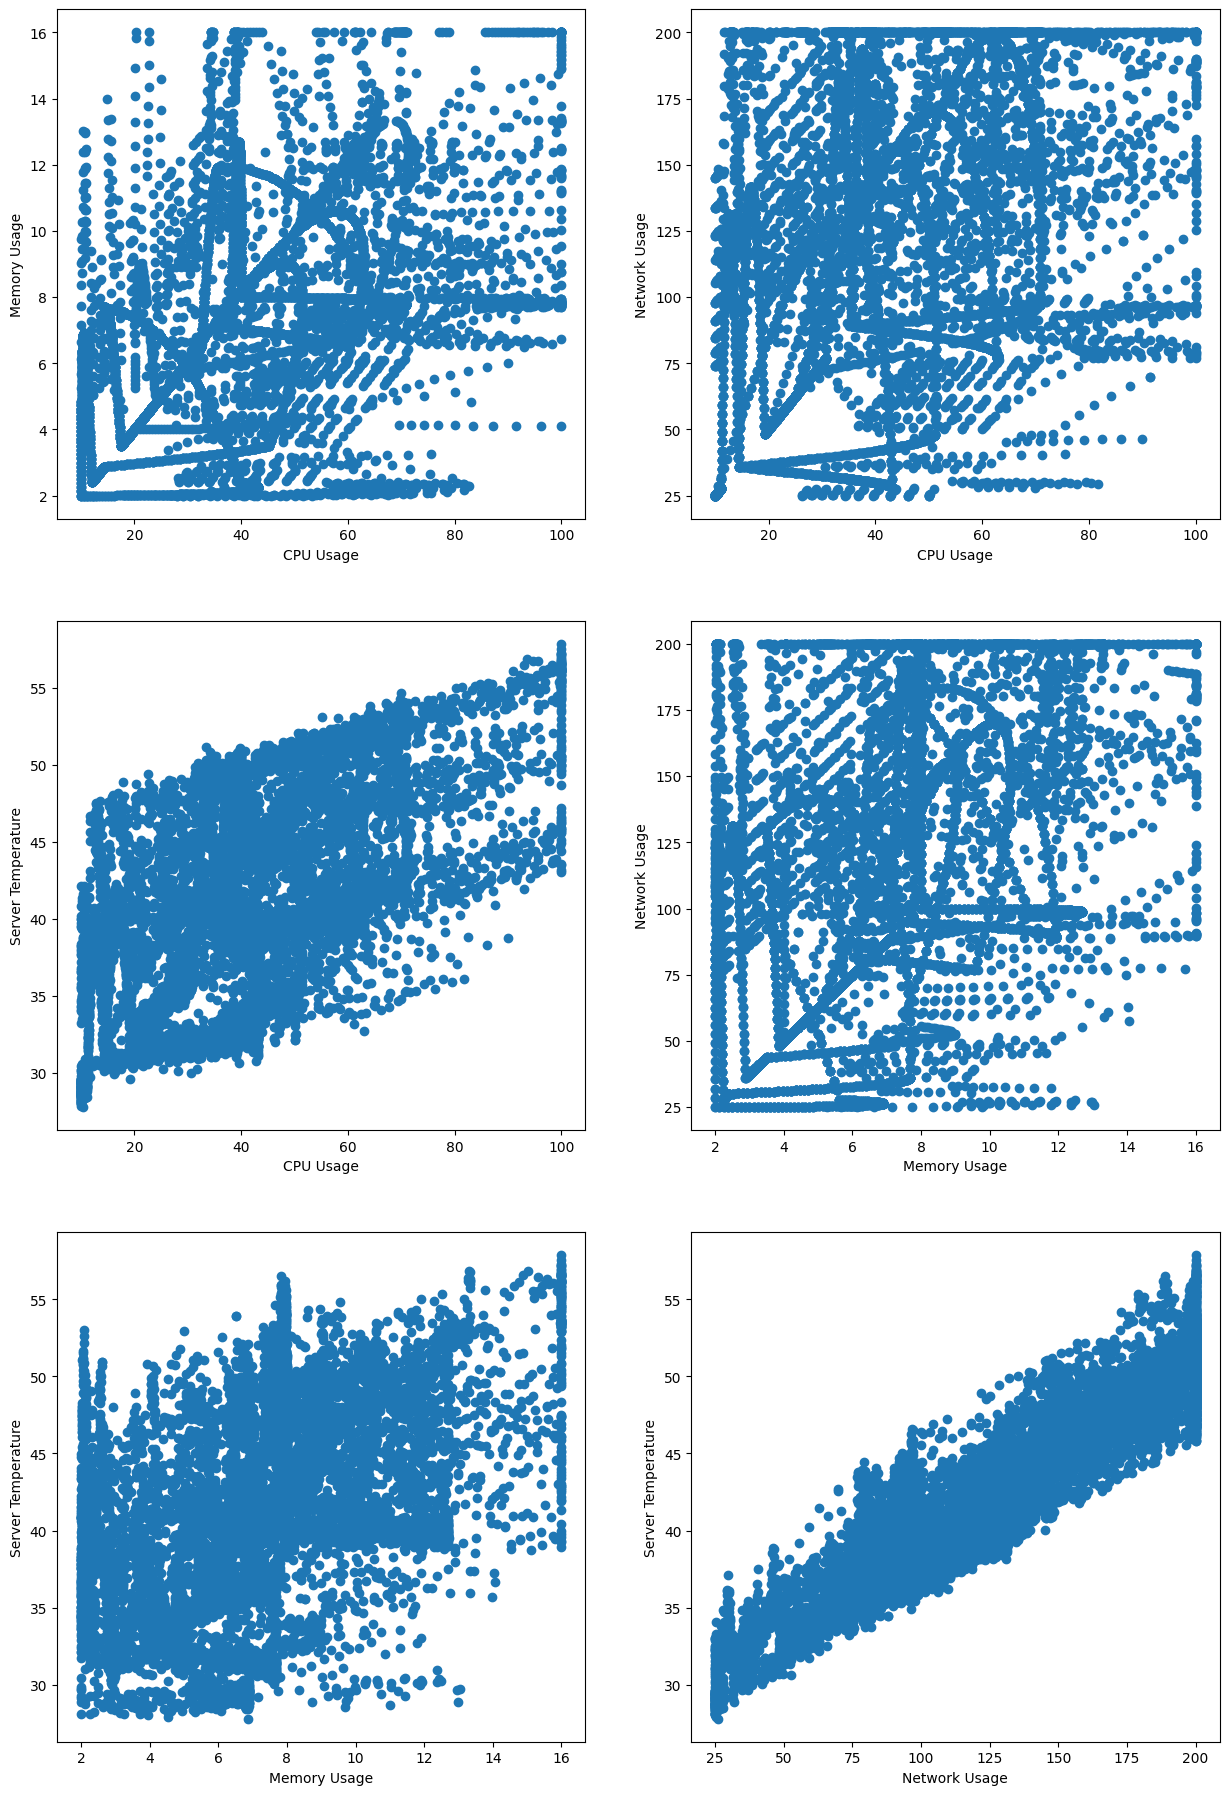

In [205]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,22.5))
plt.subplot(3,2,1)
plt.xlabel("CPU Usage")
plt.ylabel("Memory Usage")
plt.scatter(cpu, mem)

plt.subplot(3,2,2)
plt.xlabel("CPU Usage")
plt.ylabel("Network Usage")
plt.scatter(cpu, net)

plt.subplot(3,2,3)
plt.xlabel("CPU Usage")
plt.ylabel("Server Temperature")
plt.scatter(cpu, temp)

plt.subplot(3,2,4)
plt.xlabel("Memory Usage")
plt.ylabel("Network Usage")
plt.scatter(mem, net)

plt.subplot(3,2,5)
plt.xlabel("Memory Usage")
plt.ylabel("Server Temperature")
plt.scatter(mem, temp)

plt.subplot(3,2,6)
plt.xlabel("Network Usage")
plt.ylabel("Server Temperature")
plt.scatter(net, temp)


{'whiskers': [<matplotlib.lines.Line2D at 0x1908487a660>,
 'caps': [<matplotlib.lines.Line2D at 0x1908487abd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1908487a510>],
 'medians': [<matplotlib.lines.Line2D at 0x1908487b140>],
 'fliers': [<matplotlib.lines.Line2D at 0x1908487b440>],
 'means': []}

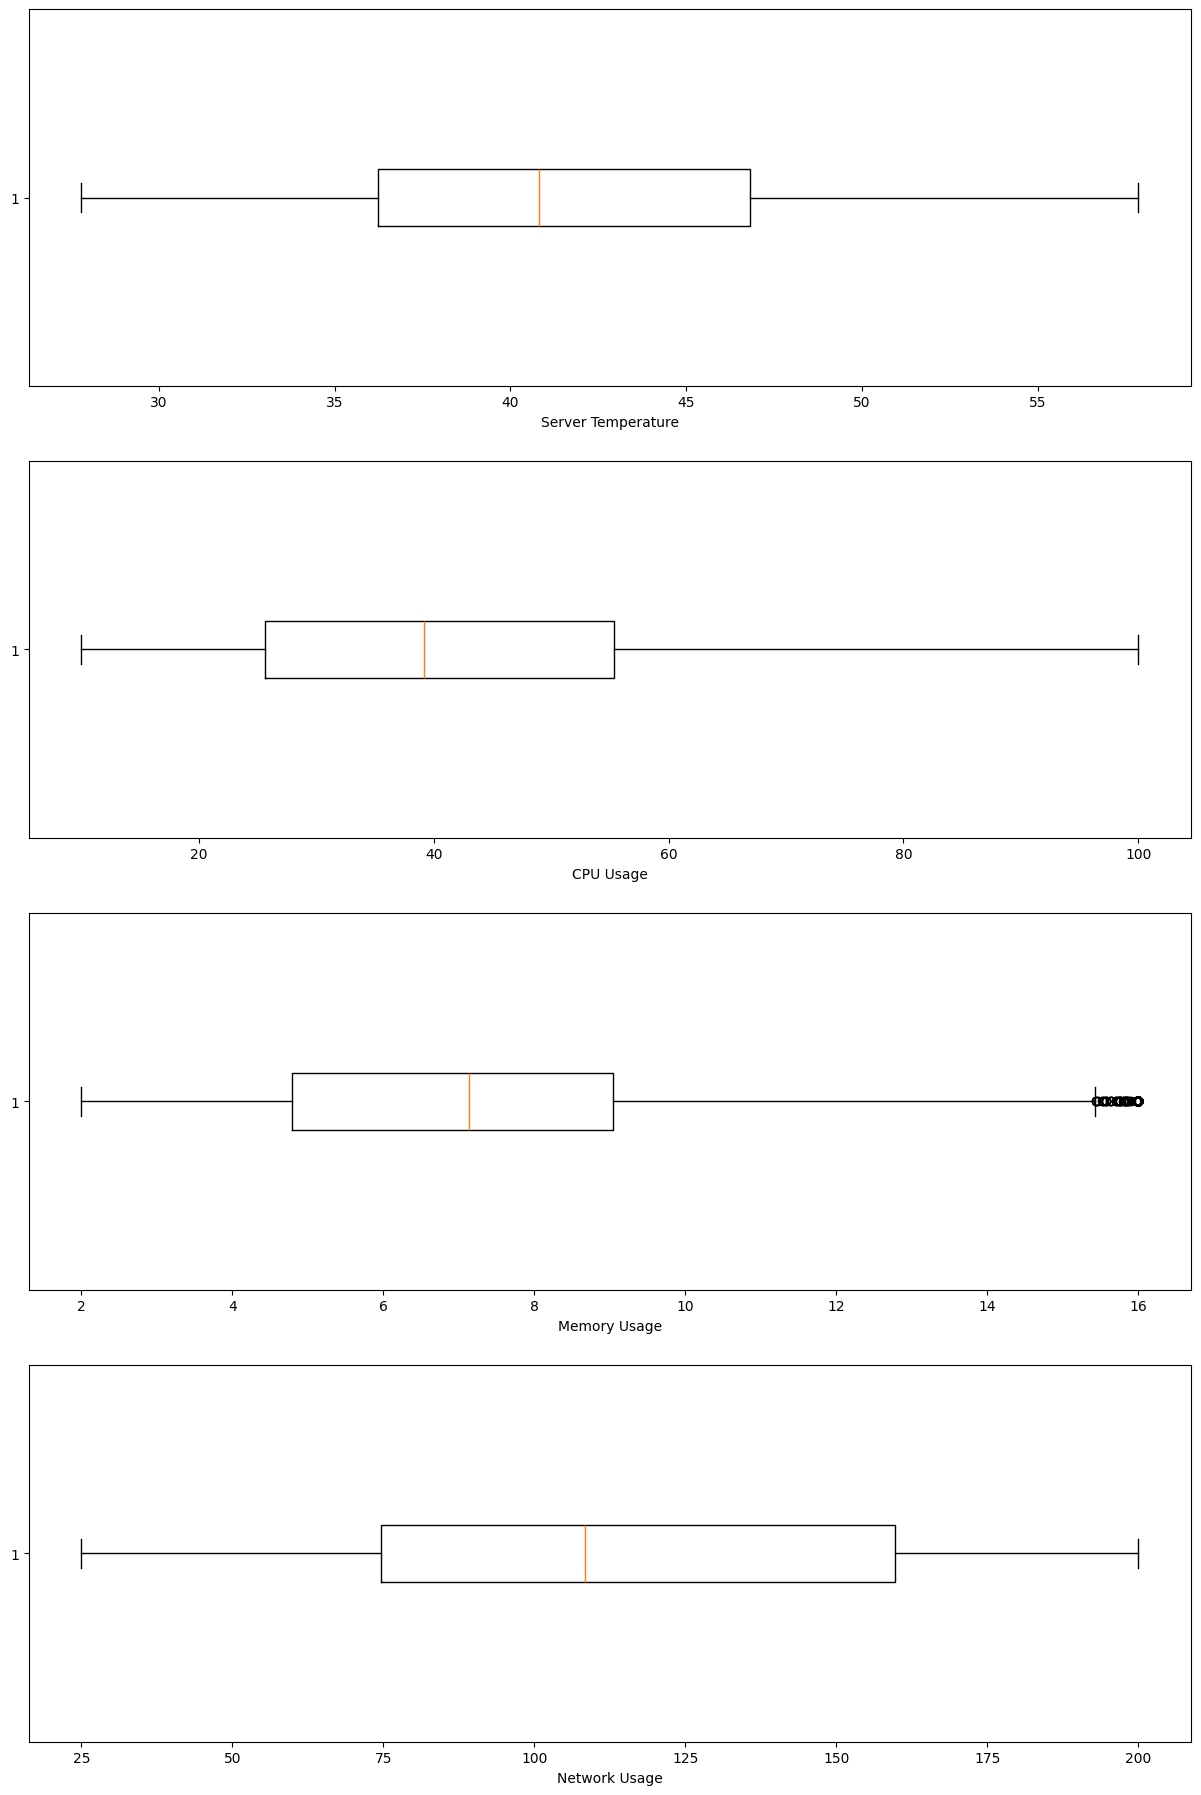

In [206]:
plt.figure(figsize=(15,22.5))
plt.subplot(4,1,1)
plt.xlabel("Server Temperature")
plt.boxplot(temp, vert=False)

plt.subplot(4,1,2)
plt.xlabel("CPU Usage")
plt.boxplot(cpu, vert=False)

plt.subplot(4,1,3)
plt.xlabel("Memory Usage")
plt.boxplot(mem, vert=False)

plt.subplot(4,1,4)
plt.xlabel("Network Usage")
plt.boxplot(net, vert=False)

In [207]:
data1 = pd.DataFrame(columns=["Time", "CPU Usage", "Memory Usage", "Network Usage", "Server Temperature"])
for  i in range(len(time)):
    data1.loc[i] = [time[i], cpu[i], mem[i], net[i], temp[i]]
data1.head()

,Time,CPU Usage,Memory Usage,Network Usage,Server Temperature
0,2024-07-09 00:00:00,25.000000,5.000000,62.500000,33.523955
1,2024-07-09 00:01:00,25.623927,5.138739,66.153574,34.201395
2,2024-07-09 00:02:00,26.247682,5.277392,69.802892,35.004666
3,2024-07-09 00:03:00,26.871095,5.415872,73.443706,34.683737
4,2024-07-09 00:04:00,27.493993,5.554094,77.071775,36.080611


In [208]:
cpuiqr = cpu.quantile(0.75) - cpu.quantile(0.25)
memiqr = mem.quantile(0.75) - mem.quantile(0.25)
netiqr = net.quantile(0.75) - net.quantile(0.25)
tempiqr = temp.quantile(0.75) - temp.quantile(0.25)

cpulow = cpu.quantile(0.25) - 1.5*cpuiqr
cpuhigh = cpu.quantile(0.75) + 1.5*cpuiqr

memlow = mem.quantile(0.25) - 1.5*memiqr
memhigh = mem.quantile(0.75) + 1.5*memiqr

netlow = net.quantile(0.25) - 1.5*netiqr
nethigh = net.quantile(0.75) + 1.5*netiqr

templow = temp.quantile(0.25) - 1.5*tempiqr
temphigh = temp.quantile(0.75) + 1.5*tempiqr

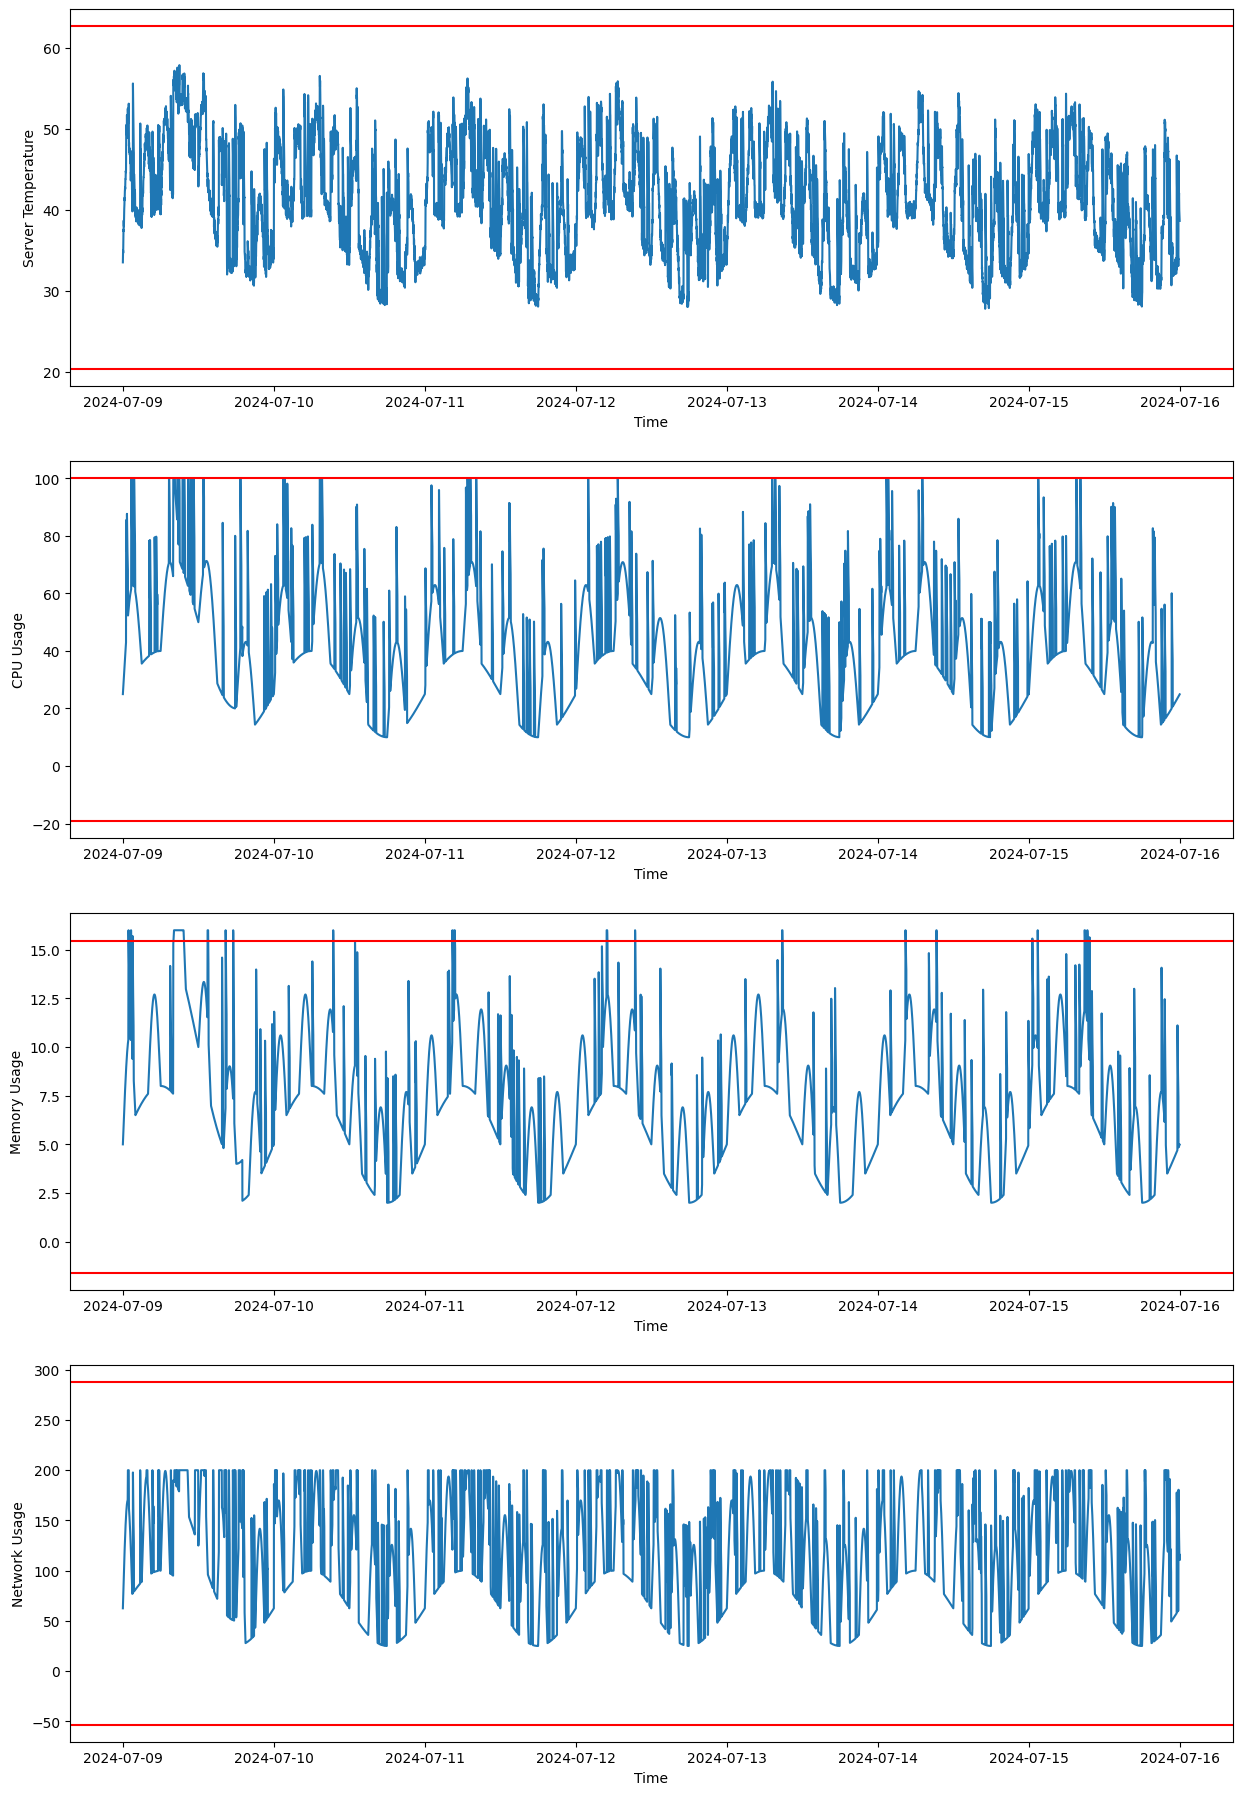

In [209]:
plt.figure(figsize=(15,22.5))
plt.subplot(4,1,1)
plt.xlabel("Time")
plt.ylabel("Server Temperature")
plt.plot(time, temp)
plt.axhline(temphigh, color = 'r')
plt.axhline(templow, color = 'r')

plt.subplot(4,1,2)
plt.xlabel("Time")
plt.ylabel("CPU Usage")
plt.plot(time, cpu)
plt.axhline(cpuhigh, color = 'r')
plt.axhline(cpulow, color = 'r')

plt.subplot(4,1,3)
plt.xlabel("Time")
plt.ylabel("Memory Usage")
plt.plot(time, mem)
plt.axhline(memhigh, color = 'r')
plt.axhline(memlow, color = 'r')

plt.subplot(4,1,4)
plt.xlabel("Time")
plt.ylabel("Network Usage")
plt.plot(time, net)
plt.axhline(nethigh, color = 'r')
plt.axhline(netlow, color = 'r')

In [211]:
from scipy.stats import kstest, norm, lognorm, weibull_min

mu, std = norm.fit(cpu)
cpu_args = [mu, std]
mu, std = norm.fit(mem)
mem_args = [mu, std]
mu, std = norm.fit(net)
net_args = [mu, std]
mu, std = norm.fit(temp)
temp_args = [mu, std]

print("Normal Distribution  --\n")
print(f"CPU Usage KS Test: {kstest(cpu, 'norm', args = cpu_args)}\n")
print(f"Memory Usage KS Test: {kstest(mem, 'norm', args = mem_args)}\n")
print(f"Network Usage KS Test: {kstest(net, 'norm', args = net_args)}\n")
print(f"Server Temperature KS Test: {kstest(temp, 'norm', args = temp_args)}\n")

shape, loc, scale = lognorm.fit(cpu)
cpu_args = [shape, loc, scale]
shape, loc, scale = lognorm.fit(mem)
mem_args = [shape, loc, scale]
shape, loc, scale = lognorm.fit(net)
net_args = [shape, loc, scale]
shape, loc, scale = lognorm.fit(temp)
temp_args = [shape, loc, scale]

print("Lognormal Distribution --\n")
print(f"CPU Usage KS Test: {kstest(cpu, 'lognorm', args = cpu_args)}\n")
print(f"Memory Usage KS Test: {kstest(mem, 'lognorm', args = mem_args)}\n")
print(f"Network Usage KS Test: {kstest(net, 'lognorm', args = net_args)}\n")
print(f"Server Temperature KS Test: {kstest(temp, 'lognorm', args = temp_args)}\n")

shape, loc, scale = weibull_min.fit(cpu)
cpu_args = [shape, loc, scale]
shape, loc, scale = weibull_min.fit(mem)
mem_args = [shape, loc, scale]
shape, loc, scale = weibull_min.fit(net)
net_args = [shape, loc, scale]
shape, loc, scale = weibull_min.fit(temp)
temp_args = [shape, loc, scale]

print("Weibull Distribution --\n")
print(f"CPU Usage KS Test: {kstest(cpu, 'weibull_min', args = cpu_args)}\n")
print(f"Memory Usage KS Test: {kstest(mem, 'weibull_min', args = mem_args)}\n")
print(f"Network Usage KS Test: {kstest(net, 'weibull_min', args = net_args)}\n")
print(f"Server Temperature KS Test: {kstest(temp, 'weibull_min', args = temp_args)}")

Normal Distribution  --

CPU Usage KS Test: KstestResult(statistic=0.07973169710255001, pvalue=3.4757306497284843e-56, statistic_location=40.0, statistic_sign=1)

Memory Usage KS Test: KstestResult(statistic=0.07841785788103817, pvalue=2.3210744034026055e-54, statistic_location=8.002533973, statistic_sign=1)

Network Usage KS Test: KstestResult(statistic=0.07751193619871077, pvalue=4.037097523737043e-53, statistic_location=100.0118917, statistic_sign=1)

Server Temperature KS Test: KstestResult(statistic=0.04945861446752886, pvalue=7.219548846297567e-22, statistic_location=47.14131145, statistic_sign=-1)

Lognormal Distribution --

CPU Usage KS Test: KstestResult(statistic=0.038640866856688605, pvalue=1.6329999104791754e-13, statistic_location=35.46655708, statistic_sign=-1)

Memory Usage KS Test: KstestResult(statistic=0.04503355345209786, pvalue=3.3440811018995723e-18, statistic_location=6.630628476, statistic_sign=-1)

Network Usage KS Test: KstestResult(statistic=0.0636877665891830

As seen above, all the p values for each of the parameters is very small, hence the null hypothesis is accepted.

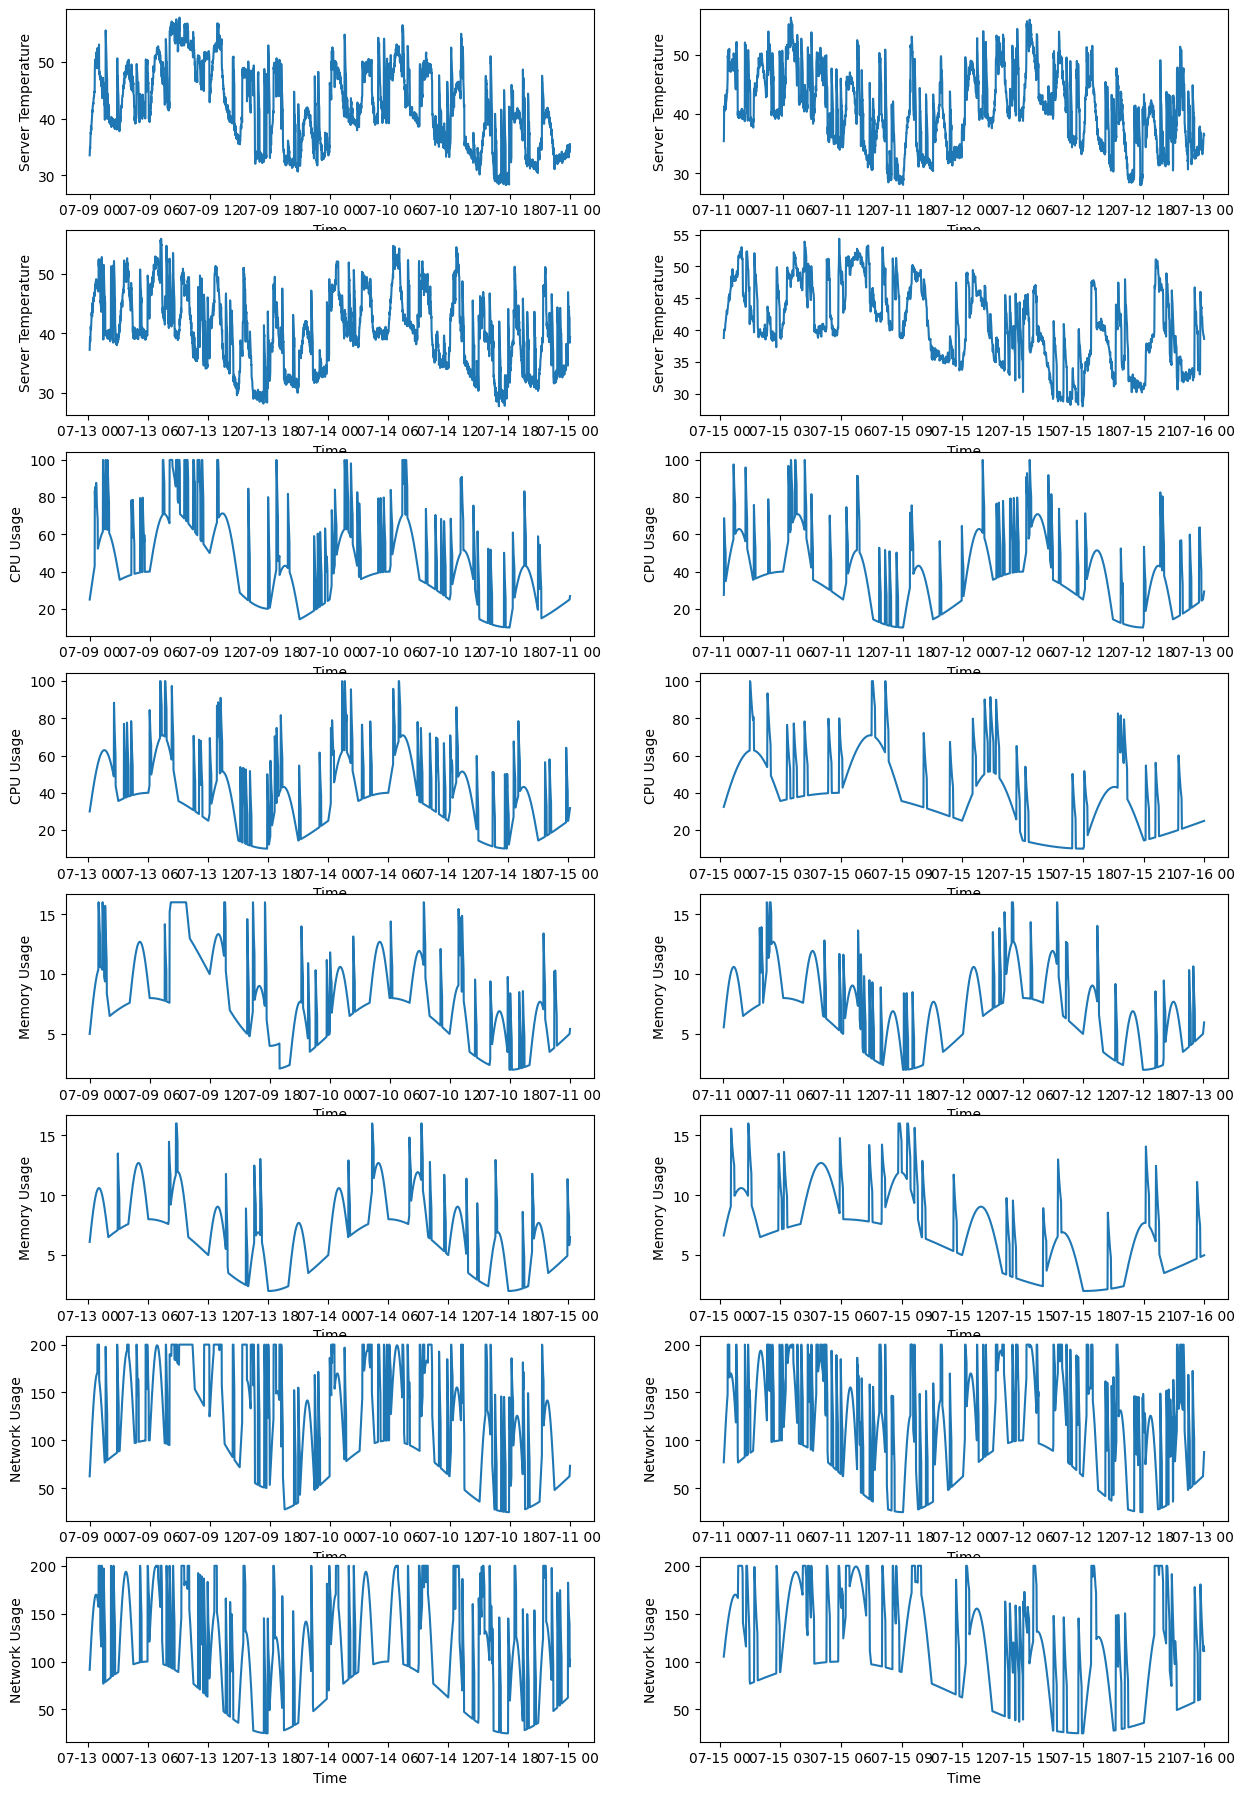

In [212]:
plt.figure(figsize=(15,22.5))
plt.subplot(8,2,1)
plt.xlabel("Time")
plt.ylabel("Server Temperature")
plt.plot(time[:2884], temp[:2884])

plt.subplot(8,2,2)
plt.xlabel("Time")
plt.ylabel("Server Temperature")
plt.plot(time[2884:5768], temp[2884:5768])

plt.subplot(8,2,3)
plt.xlabel("Time")
plt.ylabel("Server Temperature")
plt.plot(time[5768:8652], temp[5768:8652])

plt.subplot(8,2,4)
plt.xlabel("Time")
plt.ylabel("Server Temperature")
plt.plot(time[8652:], temp[8652:])

plt.subplot(8,2,5)
plt.xlabel("Time")
plt.ylabel("CPU Usage")
plt.plot(time[:2884], cpu[:2884])

plt.subplot(8,2,6)
plt.xlabel("Time")
plt.ylabel("CPU Usage")
plt.plot(time[2884:5768], cpu[2884:5768])

plt.subplot(8,2,7)
plt.xlabel("Time")
plt.ylabel("CPU Usage")
plt.plot(time[5768:8652], cpu[5768:8652])

plt.subplot(8,2,8)
plt.xlabel("Time")
plt.ylabel("CPU Usage")
plt.plot(time[8652:], cpu[8652:])

plt.subplot(8,2,9)
plt.xlabel("Time")
plt.ylabel("Memory Usage")
plt.plot(time[:2884], mem[:2884])

plt.subplot(8,2,10)
plt.xlabel("Time")
plt.ylabel("Memory Usage")
plt.plot(time[2884:5768], mem[2884:5768])

plt.subplot(8,2,11)
plt.xlabel("Time")
plt.ylabel("Memory Usage")
plt.plot(time[5768:8652], mem[5768:8652])

plt.subplot(8,2,12)
plt.xlabel("Time")
plt.ylabel("Memory Usage")
plt.plot(time[8652:], mem[8652:])

plt.subplot(8,2,13)
plt.xlabel("Time")
plt.ylabel("Network Usage")
plt.plot(time[:2884], net[:2884])

plt.subplot(8,2,14)
plt.xlabel("Time")
plt.ylabel("Network Usage")
plt.plot(time[2884:5768], net[2884:5768])

plt.subplot(8,2,15)
plt.xlabel("Time")
plt.ylabel("Network Usage")
plt.plot(time[5768:8652], net[5768:8652])

plt.subplot(8,2,16)
plt.xlabel("Time")
plt.ylabel("Network Usage")
plt.plot(time[8652:], net[8652:])